In [144]:
import sqlite3
import pandas as pd

# Connect to SQLite
conn = sqlite3.connect("../ecommerce.db")
cursor = conn.cursor()
# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('olist_customers_dataset',), ('olist_geolocation_dataset',), ('olist_orders_dataset',), ('olist_order_items_dataset',), ('olist_order_payments_dataset',), ('olist_order_reviews_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('product_category_name_translation',)]


In [145]:
customers = pd.read_sql("SELECT * FROM olist_customers_dataset", conn)
orders = pd.read_sql("SELECT * FROM olist_orders_dataset", conn)
order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", conn)
payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", conn)
reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", conn)
products = pd.read_sql("SELECT * FROM olist_products_dataset", conn)
sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset", conn)
geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", conn)
category_english = pd.read_sql("SELECT * FROM product_category_name_translation", conn)

In [15]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
customers.shape

(99441, 5)

In [17]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object

In [18]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
customers['customer_unique_id'].nunique(), customers.shape[0]

(96096, 99441)

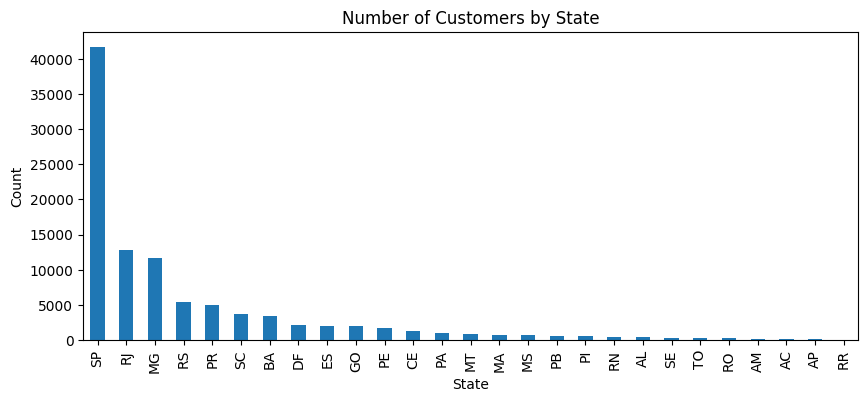

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

state_counts = customers['customer_state'].value_counts()

state_counts.plot(kind='bar', figsize=(10,4))
plt.title("Number of Customers by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

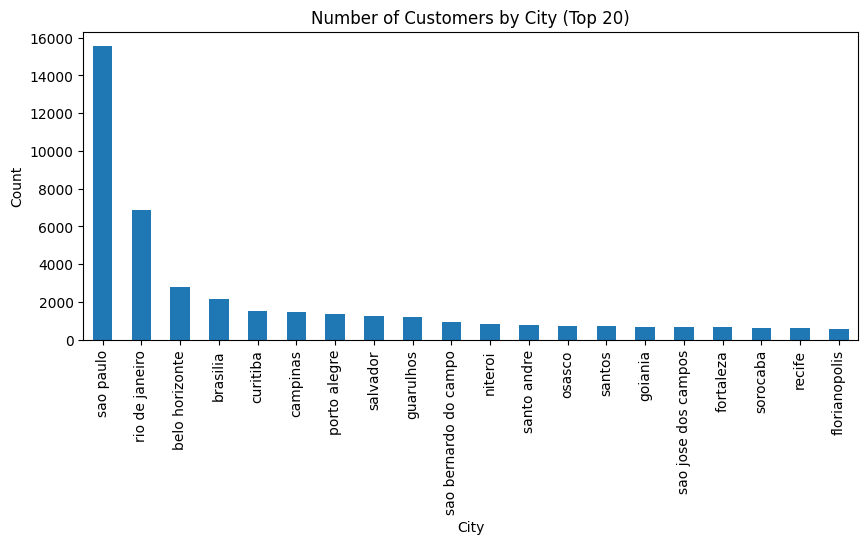

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

state_counts = customers['customer_city'].value_counts().head(20)

state_counts.plot(kind='bar', figsize=(10,4))
plt.title("Number of Customers by City (Top 20)")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

Majority of purchases are from sao paulo

In [27]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [28]:
orders.shape

(99441, 8)

In [30]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [31]:
orders['order_status'].nunique(), orders.shape[0]

(8, 99441)

In [33]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

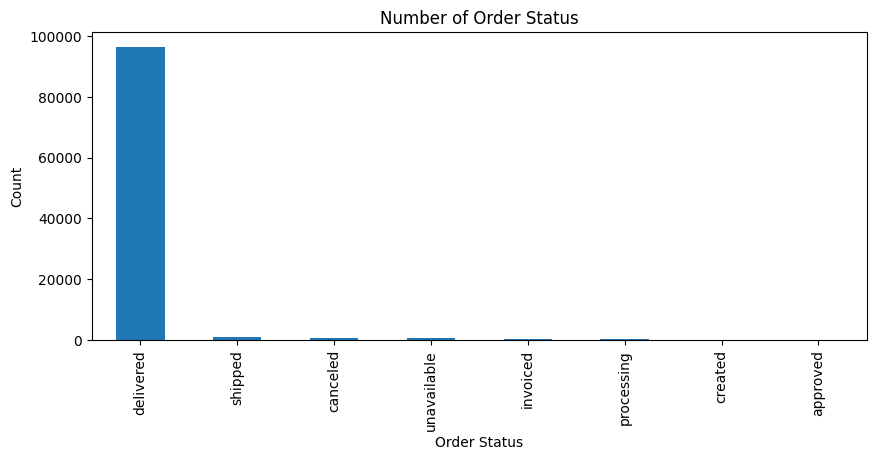

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

order_state_counts = orders['order_status'].value_counts()

order_state_counts.plot(kind='bar', figsize=(10,4))
plt.title("Number of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.show()

In [37]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)
orders['order_delivered_carrier_date'] = pd.to_datetime(
    orders['order_delivered_carrier_date']
)
orders['order_delivered_customer_date'] = pd.to_datetime(
    orders['order_delivered_customer_date']
)
orders['order_estimated_delivery_date'] = pd.to_datetime(
    orders['order_estimated_delivery_date']
)
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [43]:
orders['delivery_days'] = (
    orders['order_delivered_customer_date']
    - orders['order_purchase_timestamp']
).dt.days
orders['delivery_days'].describe()


count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_days, dtype: float64

In [39]:
orders[orders['delivery_days'] < 0].shape

(0, 9)

In [40]:
delivered = orders[
    (orders['order_status'] == 'delivered') &
    (orders['delivery_days'].notna()) &
    (orders['delivery_days'] >= 0)
]

In [44]:
delivered['delivery_days'].describe()

count    96470.000000
mean        12.093604
std          9.551380
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_days, dtype: float64

In [45]:
delivered['delivery_days'].quantile([0.9, 0.95, 0.99])

0.90    23.0
0.95    29.0
0.99    46.0
Name: delivery_days, dtype: float64

In [46]:
cap_99 = delivered['delivery_days'].quantile(0.99)
delivered['delivery_days_capped'] = delivered['delivery_days'].clip(upper=cap_99)

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3700738065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivery_days_capped'] = delivered['delivery_days'].clip(upper=cap_99)


For visualization purposes, delivery times above the 99th percentile were capped to reduce distortion from extreme outliers.

In [47]:
bins = [0, 3, 7, 14, 21, 30, 60, 120]
labels = [
    '0–3 days',
    '4–7 days',
    '8–14 days',
    '15–21 days',
    '22–30 days',
    '31–60 days',
    '60+ days'
]

delivered['delivery_bucket'] = pd.cut(
    delivered['delivery_days_capped'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3639680136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivery_bucket'] = pd.cut(


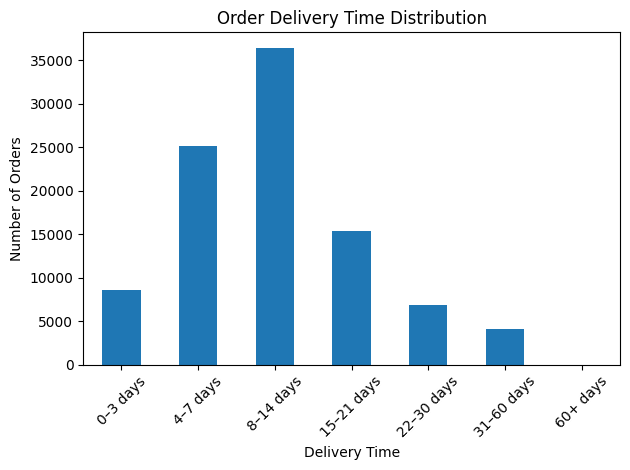

In [48]:
delivery_counts = delivered['delivery_bucket'].value_counts().sort_index()

delivery_counts.plot(kind='bar')
plt.title('Order Delivery Time Distribution')
plt.xlabel('Delivery Time')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
delivered['order_month'] = (
    delivered['order_purchase_timestamp']
    .dt.to_period('M')
    .astype(str)
)

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\845929644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['order_month'] = (


In [50]:
y_col = 'delivery_days_capped'

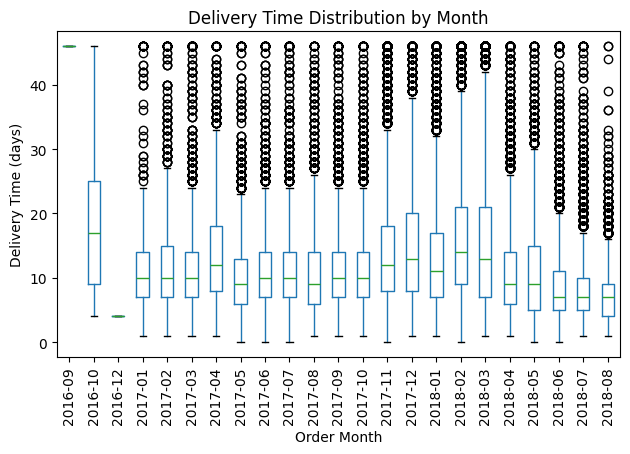

In [51]:
import matplotlib.pyplot as plt

delivered.boxplot(
    column=y_col,
    by='order_month',
    rot=90,
    grid=False
)

plt.title("Delivery Time Distribution by Month")
plt.suptitle("")  # remove auto title
plt.xlabel("Order Month")
plt.ylabel("Delivery Time (days)")
plt.tight_layout()
plt.show()


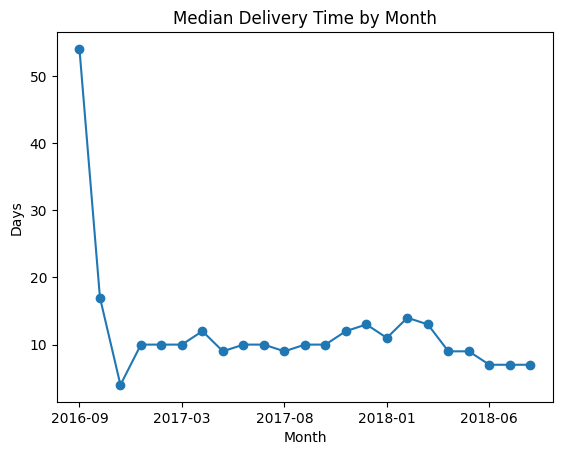

In [52]:
monthly_median = (
    delivered
    .groupby('order_month')['delivery_days']
    .median()
)

monthly_median.plot(kind='line', marker='o')
plt.title("Median Delivery Time by Month")
plt.ylabel("Days")
plt.xlabel("Month")
plt.show()

Median Delivery Time appears to be similar across all months, with slight increase in Mar

In [53]:
delivered['delivery_delay_days'] = (
    delivered['order_delivered_customer_date']
    - delivered['order_estimated_delivery_date']
).dt.days

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\396575372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivery_delay_days'] = (


In [54]:
delivered['delivery_delay_days'].describe()

count    96470.000000
mean       -11.875889
std         10.182105
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay_days, dtype: float64

In [55]:
upper_cap = delivered['delivery_delay_days'].quantile(0.99)
lower_cap = delivered['delivery_delay_days'].quantile(0.01)

In [56]:
delivered['delivery_delay_capped'] = delivered['delivery_delay_days'].clip(
    lower=lower_cap,
    upper=upper_cap
)

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\4260379893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['delivery_delay_capped'] = delivered['delivery_delay_days'].clip(


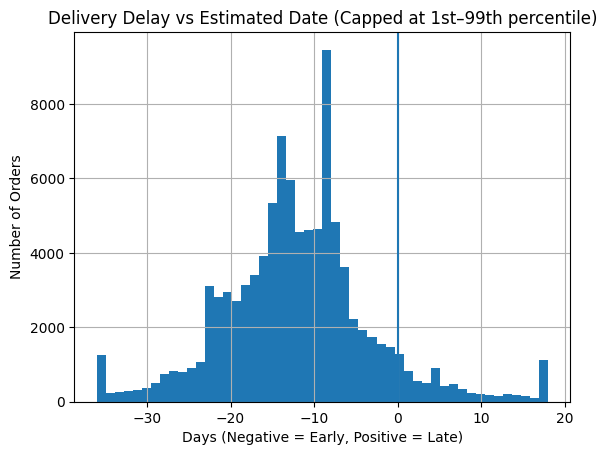

In [62]:
delivered['delivery_delay_capped'].hist(bins=50)
plt.axvline(0)
plt.title("Delivery Delay vs Estimated Date (Capped at 1st–99th percentile)")
plt.xlabel("Days (Negative = Early, Positive = Late)")
plt.ylabel("Number of Orders")
plt.show()


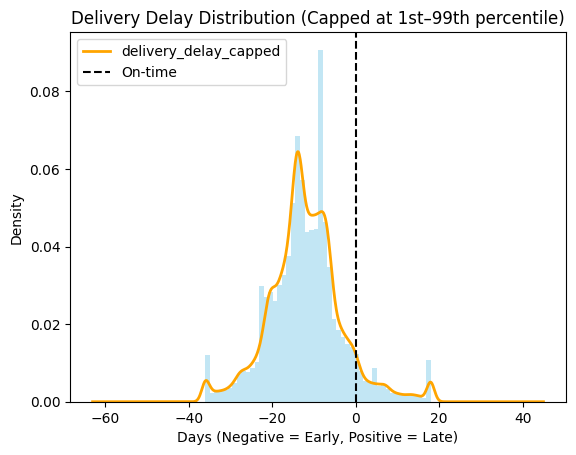

In [64]:
import matplotlib.pyplot as plt

# Histogram + KDE
delivered['delivery_delay_capped'].hist(
    bins=50,
    density=True,
    alpha=0.5,
    color='skyblue'
)

# KDE plot (smoothed density)
delivered['delivery_delay_capped'].plot(
    kind='kde',
    linewidth=2,
    color='orange'
)

plt.axvline(0, color='black', linestyle='--', label='On-time')
plt.title("Delivery Delay Distribution (Capped at 1st–99th percentile)")
plt.xlabel("Days (Negative = Early, Positive = Late)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [65]:
import numpy as np
from scipy.stats import gaussian_kde

# Drop NaNs
data = delivered['delivery_delay_capped'].dropna()

# Compute KDE
kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 1000)
y = kde(x)

In [66]:
peak_index = np.argmax(y)
most_common_delay = x[peak_index]
most_common_delay

np.float64(-13.837837837837835)

Deliveries can be expected to likely be ~ 2weeks ahead of estimated delivery date

In [67]:
# True for deliveries on time or early
on_time_or_early = delivered['delivery_delay_days'] <= 0

In [68]:
percent_on_time_or_early = on_time_or_early.mean() * 100
percent_on_time_or_early

np.float64(93.22690992018245)

93.2% of deliveries are on time.

In [75]:
# Merge orders with customers to get state info
orders_merged = orders.merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

In [76]:
# Only delivered orders
delivered_orders = orders_merged[orders_merged['order_status'] == 'delivered'].copy()

# Delivery time in days
delivered_orders['delivery_days'] = (
    delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']
).dt.days

# Cap extreme outliers at 99th percentile (same as before)
upper_cap = delivered_orders['delivery_days'].quantile(0.99)
lower_cap = delivered_orders['delivery_days'].quantile(0.01)
delivered_orders['delivery_days_capped'] = delivered_orders['delivery_days'].clip(lower=lower_cap, upper=upper_cap)

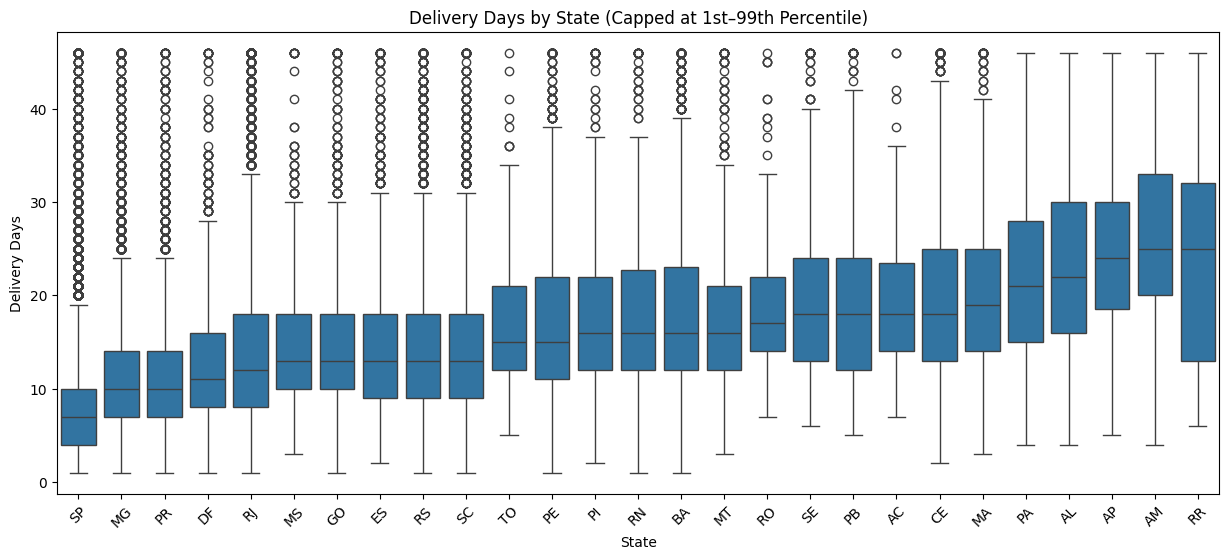

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.boxplot(
    data=delivered_orders,
    x='customer_state',
    y='delivery_days_capped',
    order=delivered_orders.groupby('customer_state')['delivery_days_capped'].median().sort_values().index
)
plt.xticks(rotation=45)
plt.title("Delivery Days by State (Capped at 1st–99th Percentile)")
plt.xlabel("State")
plt.ylabel("Delivery Days")
plt.show()

In [79]:
# Merge to get state for each order
orders_merged = orders.merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

# Filter only delivered orders
delivered_orders = orders_merged[orders_merged['order_status'] == 'delivered'].copy()

In [80]:
# Delivery delay = actual delivery - estimated delivery
delivered_orders['delivery_delay_days'] = (
    delivered_orders['order_delivered_customer_date'] - delivered_orders['order_estimated_delivery_date']
).dt.days

# Cap extremes at 1st and 99th percentile
lower_cap = delivered_orders['delivery_delay_days'].quantile(0.01)
upper_cap = delivered_orders['delivery_delay_days'].quantile(0.99)

delivered_orders['delivery_delay_capped'] = delivered_orders['delivery_delay_days'].clip(
    lower=lower_cap, upper=upper_cap
)


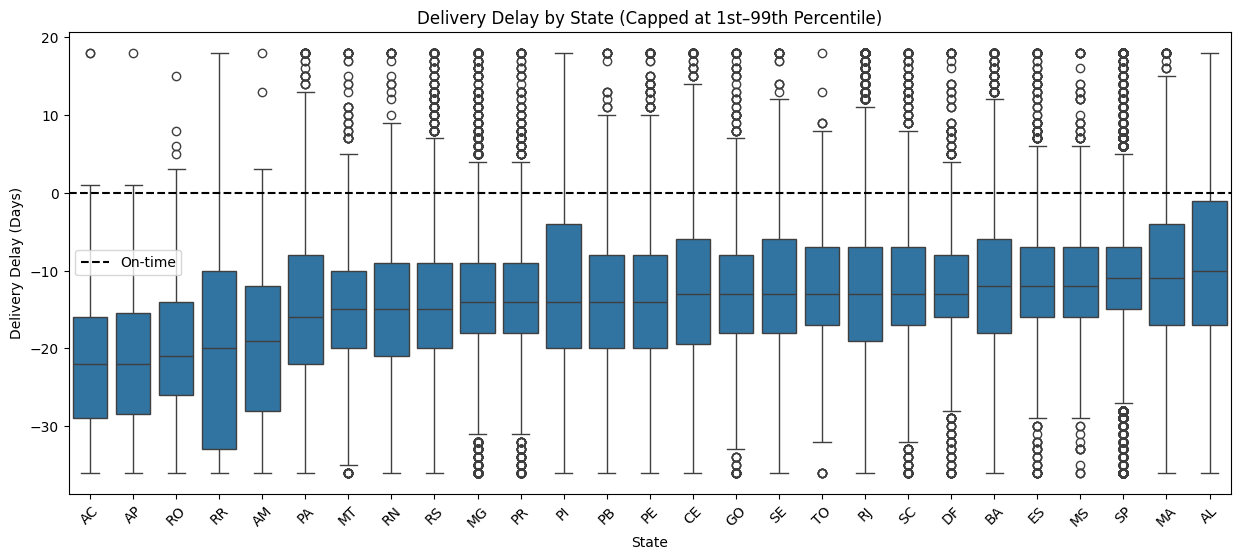

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

# Order states by median delivery delay for clarity
state_order = delivered_orders.groupby('customer_state')['delivery_delay_capped'].median().sort_values().index

sns.boxplot(
    data=delivered_orders,
    x='customer_state',
    y='delivery_delay_capped',
    order=state_order
)

plt.axhline(0, color='black', linestyle='--', label='On-time')
plt.xticks(rotation=45)
plt.title("Delivery Delay by State (Capped at 1st–99th Percentile)")
plt.xlabel("State")
plt.ylabel("Delivery Delay (Days)")
plt.legend()
plt.show()


Some states have much longer delivery times than others, but overall a good amount of orders in each state are delivered on time.

In [82]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [88]:
order_items.shape

(112650, 7)

In [89]:
order_items.dtypes

order_id               object
order_item_id          object
product_id             object
seller_id              object
shipping_limit_date    object
price                  object
freight_value          object
dtype: object

In [91]:
order_items['order_id'].nunique(), order_items.shape[0]

(98666, 112650)

In [93]:
order_items['order_id'].unique()

array(['00010242fe8c5a6d1ba2dd792cb16214',
       '00018f77f2f0320c557190d7a144bdd3',
       '000229ec398224ef6ca0657da4fc703e', ...,
       'fffce4705a9662cd70adb13d4a31832d',
       'fffe18544ffabc95dfada21779c9644f',
       'fffe41c64501cc87c801fd61db3f6244'], shape=(98666,), dtype=object)

In [95]:
order_items['product_id'].nunique(), order_items.shape[0]

(32951, 112650)

In [94]:
order_items['product_id'].unique()

array(['4244733e06e7ecb4970a6e2683c13e61',
       'e5f2d52b802189ee658865ca93d83a8f',
       'c777355d18b72b67abbeef9df44fd0fd', ...,
       'dd469c03ad67e201bc2179ef077dcd48',
       'bbe7651fef80287a816ead73f065fc4b',
       '350688d9dc1e75ff97be326363655e01'], shape=(32951,), dtype=object)

In [135]:
# Sum quantity per product
product_sales = order_items.groupby('product_id')['order_item_id'].count().reset_index()
product_sales = product_sales.rename(columns={'order_item_id': 'num_orders'})
product_sales = product_sales.sort_values(by='num_orders', ascending=False)
product_sales.head(10)

,product_id,num_orders
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527
19742,99a4788cb24856965c36a24e339b6058,488
8613,422879e10f46682990de24d770e7f83d,484
7364,389d119b48cf3043d311335e499d9c6b,392
7079,368c6c730842d78016ad823897a372db,388
10840,53759a2ecddad2bb87a079a1f1519f73,373
27039,d1c427060a0f73f6b889a5c7c61f2ac4,343
10867,53b36df67ebb7c41585e8d54d6772e08,323
2794,154e7e31ebfa092203795c972e5804a6,281
8051,3dd2a17168ec895c781a9191c1e95ad7,274


In [136]:
product_sales_named = product_sales.merge(
    products[['product_id', 'product_category_name']],  # pick the columns you want
    on='product_id',
    how='left'  # keep all products from product_sales
)

In [138]:
product_sales_named.head()

,product_id,num_orders,product_category_name
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,moveis_decoracao
1,99a4788cb24856965c36a24e339b6058,488,cama_mesa_banho
2,422879e10f46682990de24d770e7f83d,484,ferramentas_jardim
3,389d119b48cf3043d311335e499d9c6b,392,ferramentas_jardim
4,368c6c730842d78016ad823897a372db,388,ferramentas_jardim


In [137]:
category_english.head()

,"product_category_name,product_category_name_english"
0,"beleza_saude,health_beauty"
1,"informatica_acessorios,computers_accessories"
2,"automotivo,auto"
3,"cama_mesa_banho,bed_bath_table"
4,"moveis_decoracao,furniture_decor"


In [146]:
category_english.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [147]:
product_sales_named_english = product_sales_named.merge(
    category_english[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'  # LEFT JOIN: keep all products even if translation missing
)

In [148]:
product_sales_named_english.head(10)

,product_id,num_orders,product_category_name,product_category_name_english
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,moveis_decoracao,furniture_decor
1,99a4788cb24856965c36a24e339b6058,488,cama_mesa_banho,bed_bath_table
2,422879e10f46682990de24d770e7f83d,484,ferramentas_jardim,garden_tools
3,389d119b48cf3043d311335e499d9c6b,392,ferramentas_jardim,garden_tools
4,368c6c730842d78016ad823897a372db,388,ferramentas_jardim,garden_tools
5,53759a2ecddad2bb87a079a1f1519f73,373,ferramentas_jardim,garden_tools
6,d1c427060a0f73f6b889a5c7c61f2ac4,343,informatica_acessorios,computers_accessories
7,53b36df67ebb7c41585e8d54d6772e08,323,relogios_presentes,watches_gifts
8,154e7e31ebfa092203795c972e5804a6,281,beleza_saude,health_beauty
9,3dd2a17168ec895c781a9191c1e95ad7,274,informatica_acessorios,computers_accessories


Top Volume Individual Products are from furniture_decor, bed_bath_table and garden_tools

In [149]:
# Group by English category and sum orders
category_sales = (
    product_sales_named_english
    .groupby('product_category_name_english')['num_orders']
    .sum()
    .reset_index()
    .sort_values(by='num_orders', ascending=False)
)

In [151]:
category_sales.head(10)

,product_category_name_english,num_orders
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3724146317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


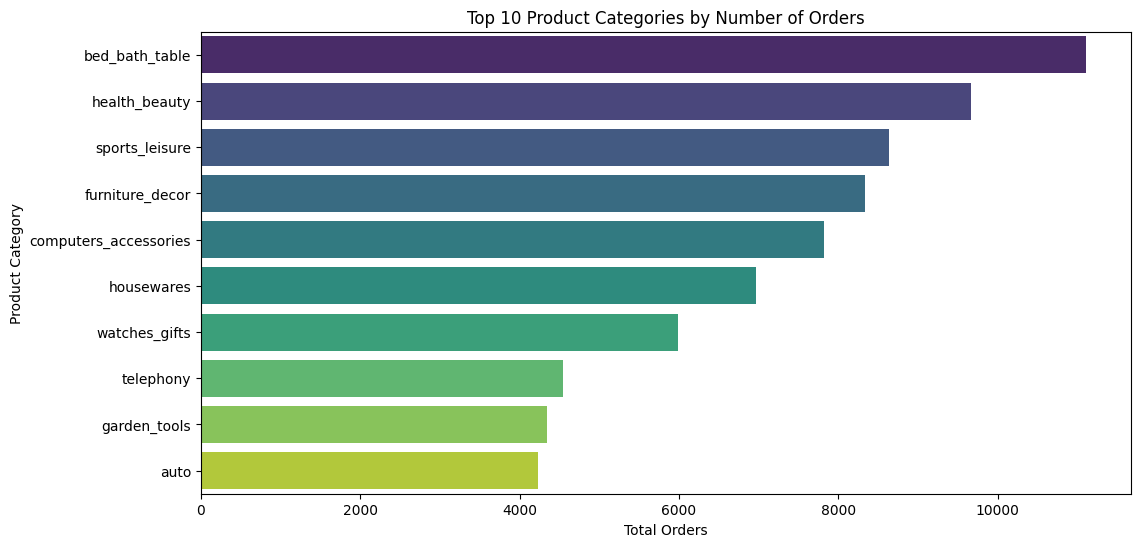

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=category_sales.head(10),  # top 10 categories
    x='num_orders',
    y='product_category_name_english',
    palette='viridis'
)
plt.title("Top 10 Product Categories by Number of Orders")
plt.xlabel("Total Orders")
plt.ylabel("Product Category")
plt.show()

Top Volume Categories: bed_bath_table, health_beauty and then sports_leisure

In [156]:
# Merge order_items with products to get category
order_items_with_category = order_items.merge(
    products[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

# Merge with English category names
order_items_with_category = order_items_with_category.merge(
    category_english[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'
)

In [157]:
order_items_with_category.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,housewares
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,telephony
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,garden_tools
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,health_beauty
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,books_technical


In [158]:
order_items_with_category['price'] = pd.to_numeric(order_items_with_category['price'], errors='coerce')

In [159]:
order_items_with_category = order_items_with_category.dropna(subset=['price'])

In [161]:
category_revenue = (
    order_items_with_category
    .groupby('product_category_name_english')['price']
    .sum()
    .reset_index()
    .sort_values(by='price', ascending=False)
)

category_revenue = category_revenue.rename(columns={'price': 'total_revenue'})
category_revenue.head(10)

,product_category_name_english,total_revenue
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32
39,furniture_decor,729762.49
20,cool_stuff,635290.85
49,housewares,632248.66
5,auto,592720.11
42,garden_tools,485256.46


C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\4007860812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


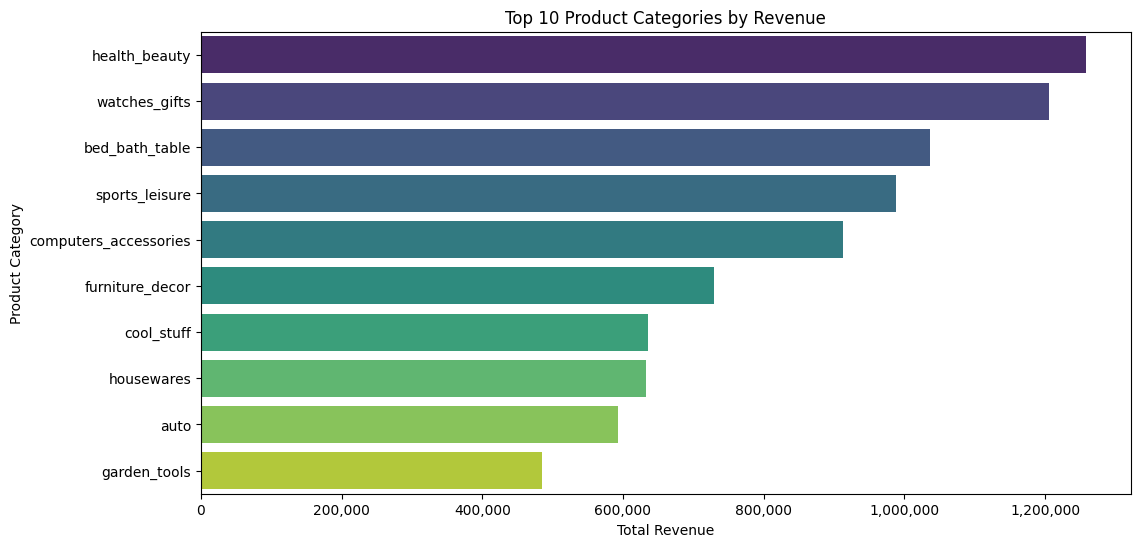

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=category_revenue.head(10),  # top 10 categories
    x='total_revenue',
    y='product_category_name_english',
    palette='viridis'
)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [164]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [170]:
payments['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [178]:
payments['payment_installments_capped'] = payments['payment_installments_capped'].astype(int)

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\1185844286.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


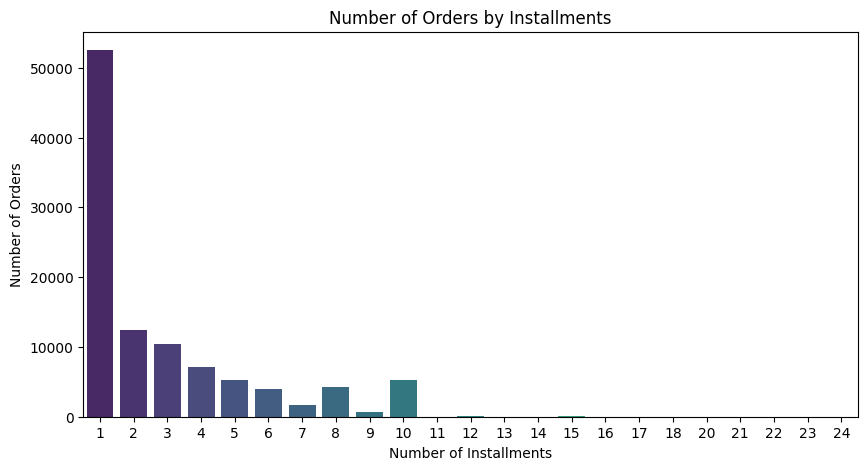

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of orders per number of installments
installments_counts = payments['payment_installments'].value_counts()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    x=installments_counts.index,
    y=installments_counts.values,
    palette='viridis'
)
plt.title("Number of Orders by Installments")
plt.xlabel("Number of Installments")
plt.xlim(left=0.5)
plt.ylabel("Number of Orders")
plt.show()

In [182]:
# Group by Payment Method and sum 
payment_method = (
    payments
    .groupby('payment_type')
    .size()
    .reset_index(name='num_payments')
    .sort_values(by='num_payments', ascending=False)
)

In [184]:
payment_method.head(5)

,payment_type,num_payments
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


In [ ]:
#Filter out not_defined
payment_method = payment_method[
    payment_method['payment_type'] != 'not_defined'
]

C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\2438783077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


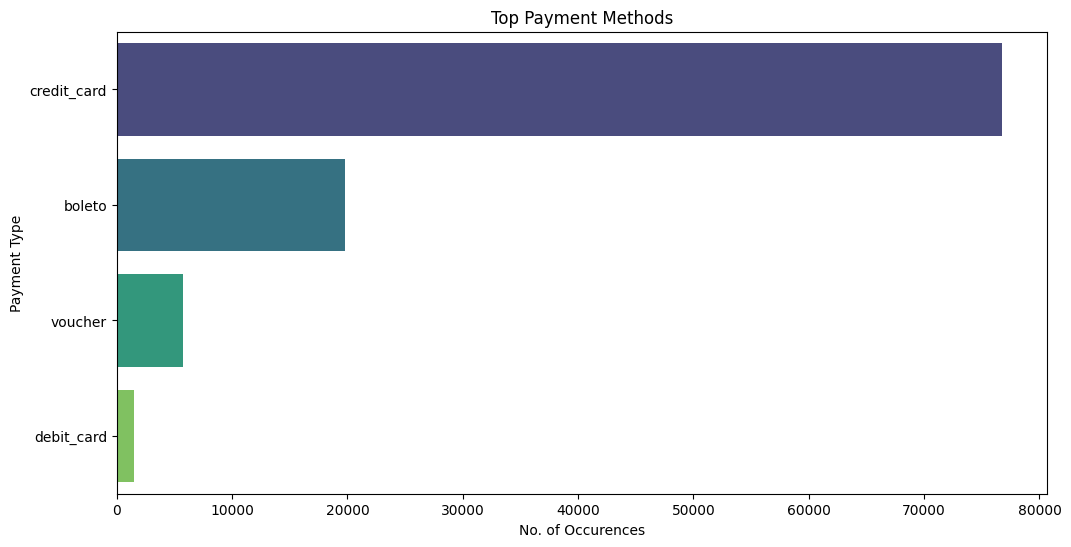

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=payment_method.head(5),  # top 5 payment methods
    x='num_payments',
    y='payment_type',
    palette='viridis'
)
plt.title("Top Payment Methods")
plt.xlabel("No. of Occurences")
plt.ylabel("Payment Type")
plt.show()

Most Customers Pay by Credit Card, followed by Boleto, Voucher then Debit Card

In [200]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [194]:
# Group by Review Score and sum 
review_score = (
    reviews
    .groupby('review_score')
    .size()
    .reset_index(name='num_score')
    .sort_values(by='review_score', ascending=True)
)

In [195]:
review_score.head(5)

,review_score,num_score
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3123128436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


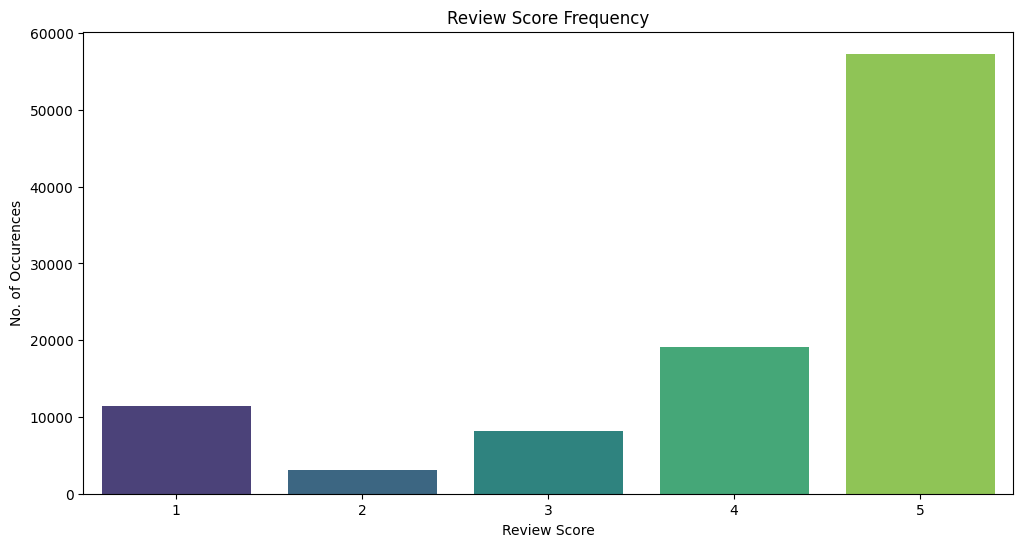

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=review_score.head(5),  # top 5 payment methods
    x='review_score',
    y='num_score',
    palette='viridis'
)
plt.title("Review Score Frequency")
plt.xlabel("Review Score")
plt.ylabel("No. of Occurences")
plt.show()

Most Customers Give a 5 point review for their purchase

In [203]:
reviews['review_creation_date'] = pd.to_datetime(
    reviews['review_creation_date']
)
reviews['review_answer_timestamp'] = pd.to_datetime(
    reviews['review_answer_timestamp']
)
reviews.dtypes

review_id                          object
order_id                           object
review_score                       object
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [209]:
reviews['review_time'] = (
    reviews['review_answer_timestamp'] - reviews['review_creation_date']
).dt.days

In [210]:
reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17,2018-02-18 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1


In [211]:
# Group by Review Time and sum 
review_time = (
    reviews
    .groupby('review_time')
    .size()
    .reset_index(name='num_score')
    .sort_values(by='review_time', ascending=True)
)

In [212]:
review_time.head()

,review_time,num_score
0,0,24361
1,1,30995
2,2,15898
3,3,14062
4,4,4601


C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3585419562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


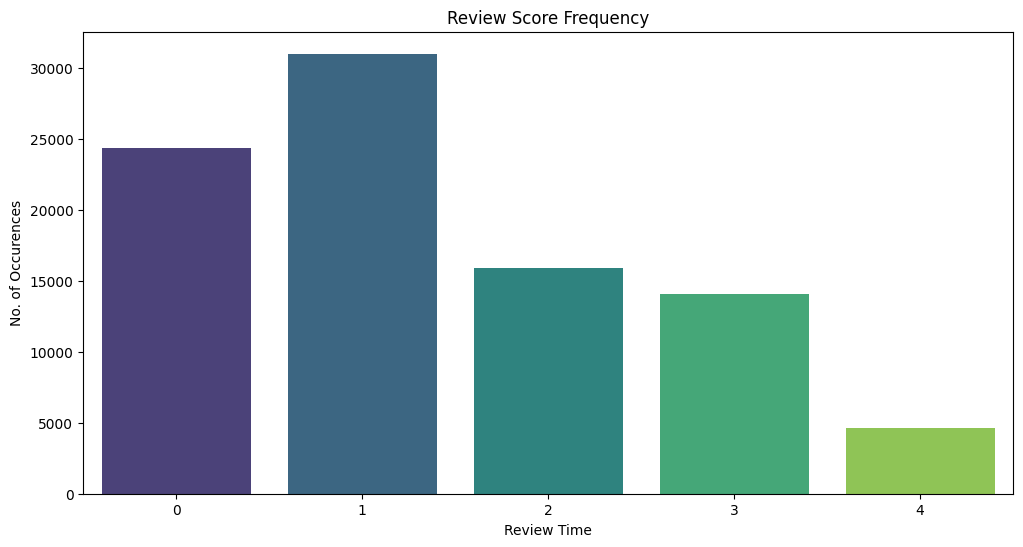

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=review_time.head(),
    x='review_time',
    y='num_score',
    palette='viridis'
)
plt.title("Review Score Frequency")
plt.xlabel("Review Time")
plt.ylabel("No. of Occurences")
plt.show()

Most Customers Submit a review between 0-1 Days after being sent the form

In [220]:
sellers.shape

(3095, 4)

In [222]:
sellers.describe()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,3442f8959a84dea7ee197c632cb2df15,14940,sao paulo,SP
freq,1,49,694,1849


In [230]:
# Group by Review Time and sum 
sellers_state = (
    sellers
    .groupby('seller_state')
    .size()
    .reset_index(name='num_score')
    .sort_values(by='num_score', ascending=False)
)

In [231]:
sellers_state.head(10)

,seller_state,num_score
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3414595851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


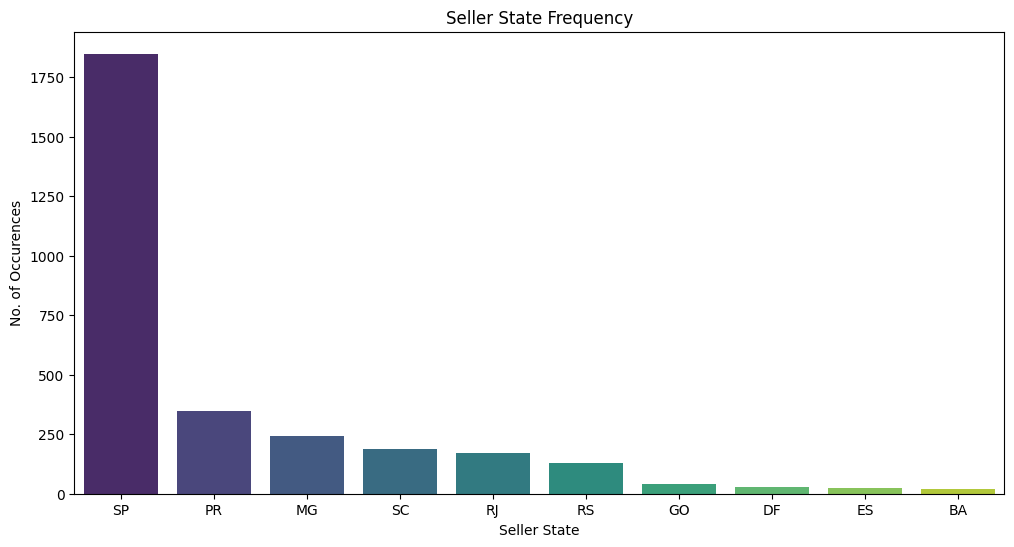

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=sellers_state.head(10),
    x='seller_state',
    y='num_score',
    palette='viridis'
)
plt.title("Seller State Frequency")
plt.xlabel("Seller State")
plt.ylabel("No. of Occurences")
plt.show()

In [233]:
# Group by Review Time and sum 
sellers_city = (
    sellers
    .groupby('seller_city')
    .size()
    .reset_index(name='num_score')
    .sort_values(by='num_score', ascending=False)
)

In [234]:
sellers_city.head(10)

,seller_city,num_score
517,sao paulo,694
159,curitiba,127
450,rio de janeiro,96
64,belo horizonte,68
442,ribeirao preto,52
220,guarulhos,50
227,ibitinga,49
483,santo andre,45
101,campinas,41
325,maringa,40


C:\Users\Kah Yuen\AppData\Local\Temp\ipykernel_21492\3584646298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


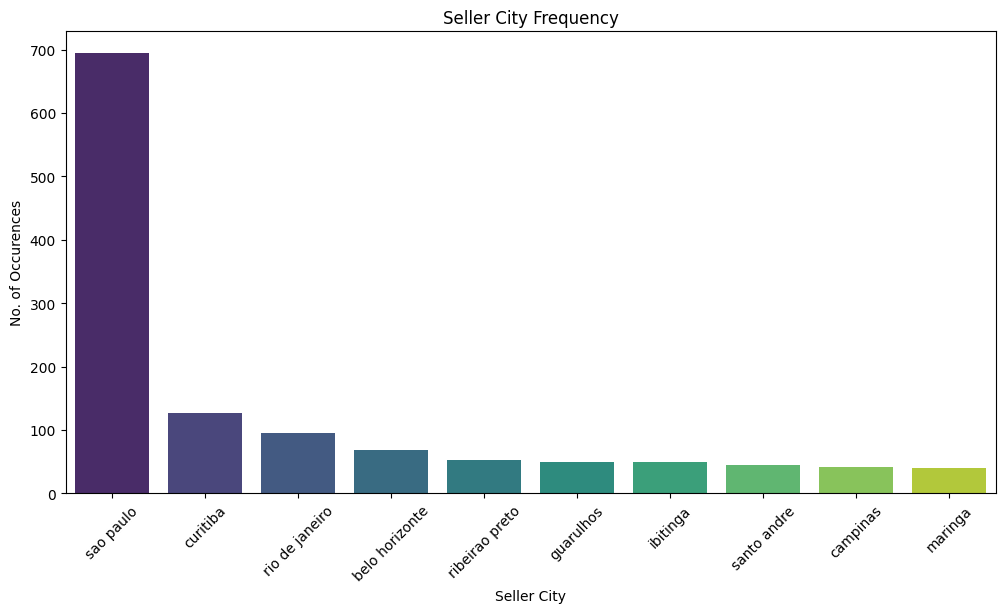

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=sellers_city.head(10),
    x='seller_city',
    y='num_score',
    palette='viridis'
)
plt.title("Seller City Frequency")
plt.xlabel("Seller City")
plt.xticks(rotation=45)
plt.ylabel("No. of Occurences")
plt.show()